Porcentagem de residentes do condado com cobertura de saúde fornecida apenas pelo governo# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 26/04/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

3. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

5. Compare os três modelos desenvolvidos.

In [1]:
#1)Features selecionadas
#povertyPercent: Percent of populace in poverty,
#incidenceRate: Mean per capita (100,000) cancer diagoses,(quanto maior o número de diagnósticos, maior o número de mortalidade por câncer.
#avgDeathsPerYear: Mean number of reported mortalities due to cancer (uma variável que está ligada a Target)

#Target
#TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities


In [2]:
#2)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('./cancer_EUA.csv', sep=';')
colunas_num = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']

for i in colunas_num:
    df[i] = df[i].str.replace(',','.')
    df[i] = df[i].astype(float)

In [4]:
df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [6]:
#Estatísticas do target
df['TARGET_deathRate']

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: TARGET_deathRate, Length: 3047, dtype: float64

In [7]:
df['TARGET_deathRate'].describe()

count    3047.000000
mean      178.491008
std        27.629797
min        56.000000
25%       161.200000
50%       178.100000
75%       195.200000
max       293.900000
Name: TARGET_deathRate, dtype: float64

In [8]:
nulos = df.isnull().sum()
nulos

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [9]:
#Analisando as features
correlacao = df.corr(method='spearman')
correlacao

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  \
avgAnnCount                 1.000000         -0.087692         -0.085583   
avgDeathsPerYear           -0.087692          1.000000          0.672511   
TARGET_deathRate           -0.085583          0.672511          1.000000   
incidenceRate               0.264905          0.274470          0.407906   
medIncome                   0.346061         -0.328660         -0.463858   
popEst2015                  0.810315         -0.043376         -0.044447   
povertyPercent             -0.195880          0.327645          0.442435   
studyPerCap                 0.508170         -0.087545         -0.112687   
MedianAge                  -0.239157         -0.006874          0.008589   
MedianAgeMale              -0.244608         -0.011604         -0.004532   
MedianAgeFemale            -0.258758          0.003867          0.019903   
AvgHouseholdSize            0.118222          0.024783          0.013300   
PercentMarried             -0.172258         -0.184165         -0.257257   
PctNoHS18_24               -0.296569          0.071910          0.124543   
PctHS18_24                 -0.235587          0.197543          0.275896   
PctSomeCol18_24             0.330782         -0.147881         -0.212383   
PctBachDeg18_24             0.381605         -0.184054         -0.270316   
PctHS25_Over               -0.347638          0.277944          0.420579   
PctBachDeg25_Over           0.392733         -0.347502         -0.501730   
PctEmployed16_Over          0.259640         -0.307593         -0.433174   
PctUnemployed16_Over        0.073620          0.284581          0.402940   
PctPrivateCoverage          0.269957         -0.301268         -0.411319   
PctPrivateCoverageAlone     0.327338         -0.265507         -0.380840   
PctEmpPrivCoverage          0.391781         -0.199474         -0.277938   
PctPublicCoverage          -0.250184          0.278845          0.402365   
PctPublicCoverageAlone     -0.153674          0.322418          0.453102   
PctWhite                   -0.182280         -0.093744         -0.101955   
PctBlack                    0.256661          0.196736          0.251542   
PctAsian                    0.561944         -0.151574         -0.207830   
PctOtherRace                0.242279         -0.120319         -0.216924   
PctMarriedHouseholds       -0.118769         -0.193525         -0.279620   
BirthRate                  -0.071837         -0.059738         -0.050487   

                         incidenceRate  medIncome  popEst2015  povertyPercent  \
avgAnnCount                   0.264905   0.346061    0.810315       -0.195880   
avgDeathsPerYear              0.274470  -0.328660   -0.043376        0.327645   
TARGET_deathRate              0.407906  -0.463858   -0.044447        0.442435   
incidenceRate                 1.000000   0.010581    0.186183        0.010033   
medIncome                     0.010581   1.000000    0.309171       -0.884297   
popEst2015                    0.186183   0.309171    1.000000       -0.083300   
povertyPercent                0.010033  -0.884297   -0.083300        1.000000   
studyPerCap                   0.162131   0.257010    0.562972       -0.125192   
MedianAge                     0.016922  -0.115359   -0.408627       -0.149297   
MedianAgeMale                 0.008706  -0.088881   -0.413663       -0.176155   
MedianAgeFemale               0.003489  -0.160013   -0.431936       -0.103869   
AvgHouseholdSize             -0.084246   0.104335    0.295149        0.088690   
PercentMarried               -0.115636   0.375900   -0.322732       -0.598271   
PctNoHS18_24                 -0.142784  -0.322642   -0.306822        0.285646   
PctHS18_24                    0.020066  -0.199432   -0.209124        0.113834   
PctSomeCol18_24               0.018900   0.274998    0.329147       -0.197924   
PctBachDeg18_24               0.103372   0.474073    0.349674       -0.430431   
PctHS25_Over                  0.128990  -0.392909   -0.380

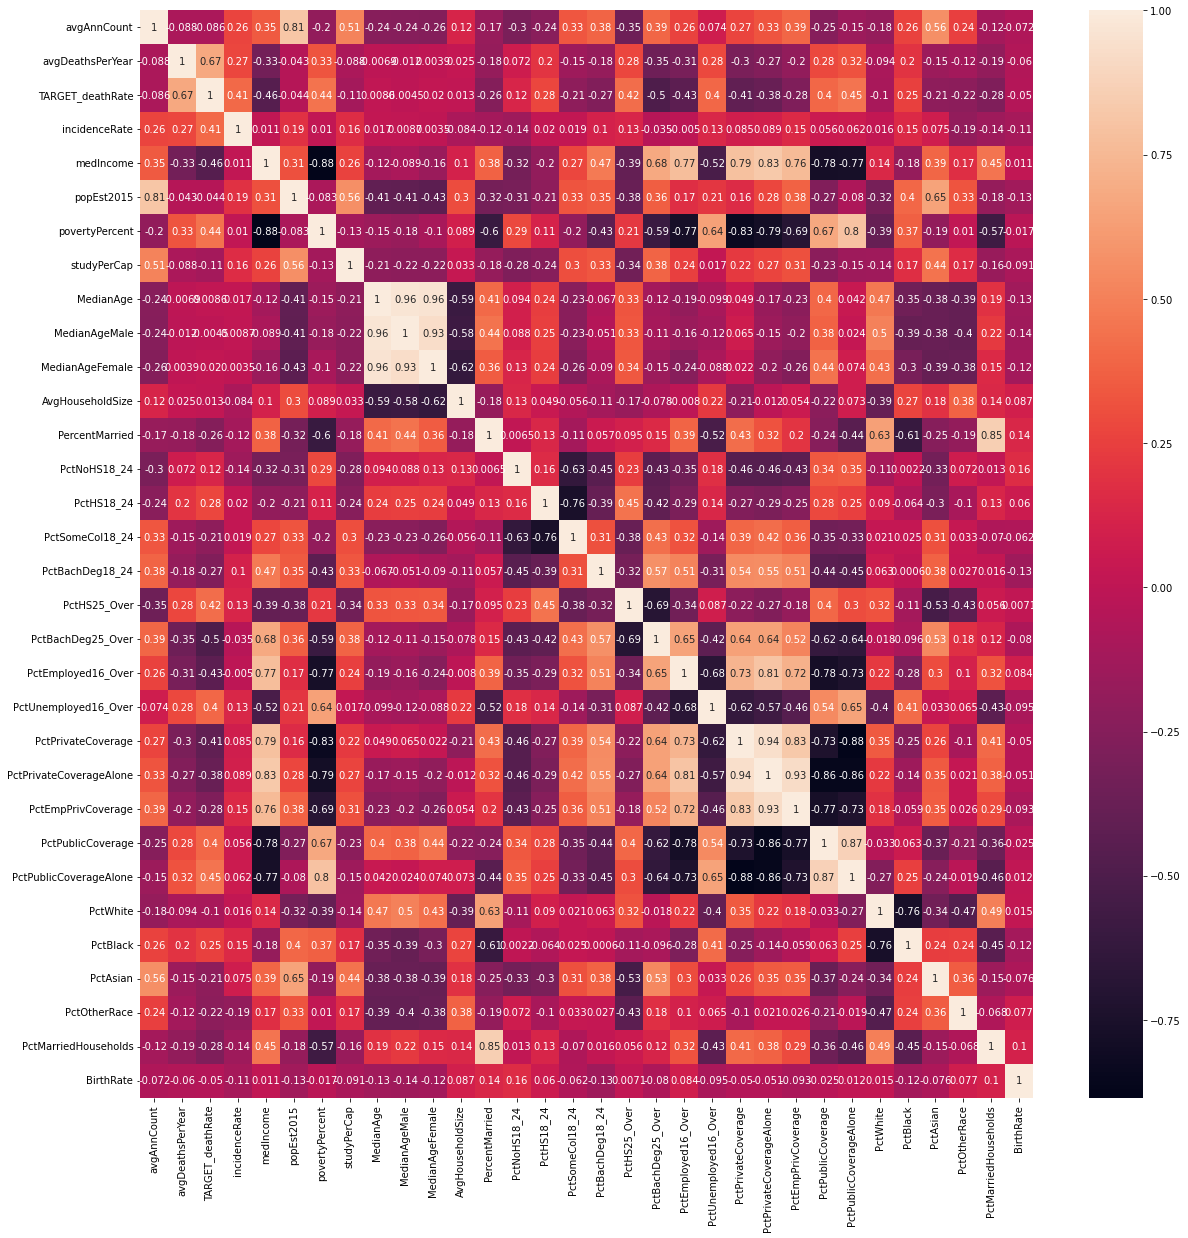

In [10]:
correlacao = df.corr(method='spearman')
plt.figure(figsize=(20,20))
sns.heatmap(correlacao,annot=True);

In [11]:
#verificando a correlação podemos ver que a feature que mais se relaciona com a Target é a média de mortes por ano, seguida da 
#Porcentagem de residentes do condado com cobertura de saúde fornecida apenas pelo governo, e da porcentagem da população na pobreza


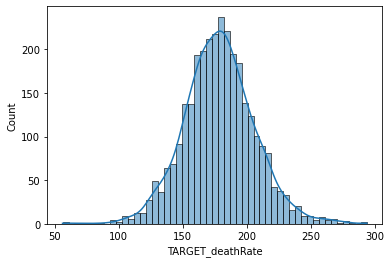

In [12]:
#3)Distribuição normal assimétrica
sns.histplot(data=df, x="TARGET_deathRate", kde=True);


In [13]:
import statistics as st
print('Média:', st.mean(df["TARGET_deathRate"]))
print('Mediana:', st.median(df["TARGET_deathRate"]))
print('Desvio padrão:', st.stdev(df["TARGET_deathRate"]))
print('Moda:', st.mode(df["TARGET_deathRate"]))

Média: 178.49100754840828
Mediana: 178.1
Desvio padrão: 27.629796675852056
Moda: 184.3


In [14]:
df["TARGET_deathRate"].skew() # Distribuição assimétrica positiva


0.12931340277335948

In [15]:
# 3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

plt.figure(figsize=(20,20))
df_features=df[["TARGET_deathRate","povertyPercent","incidenceRate","avgDeathsPerYear"]]
df_features.boxplot(column="avgDeathsPerYear");


<AxesSubplot:>

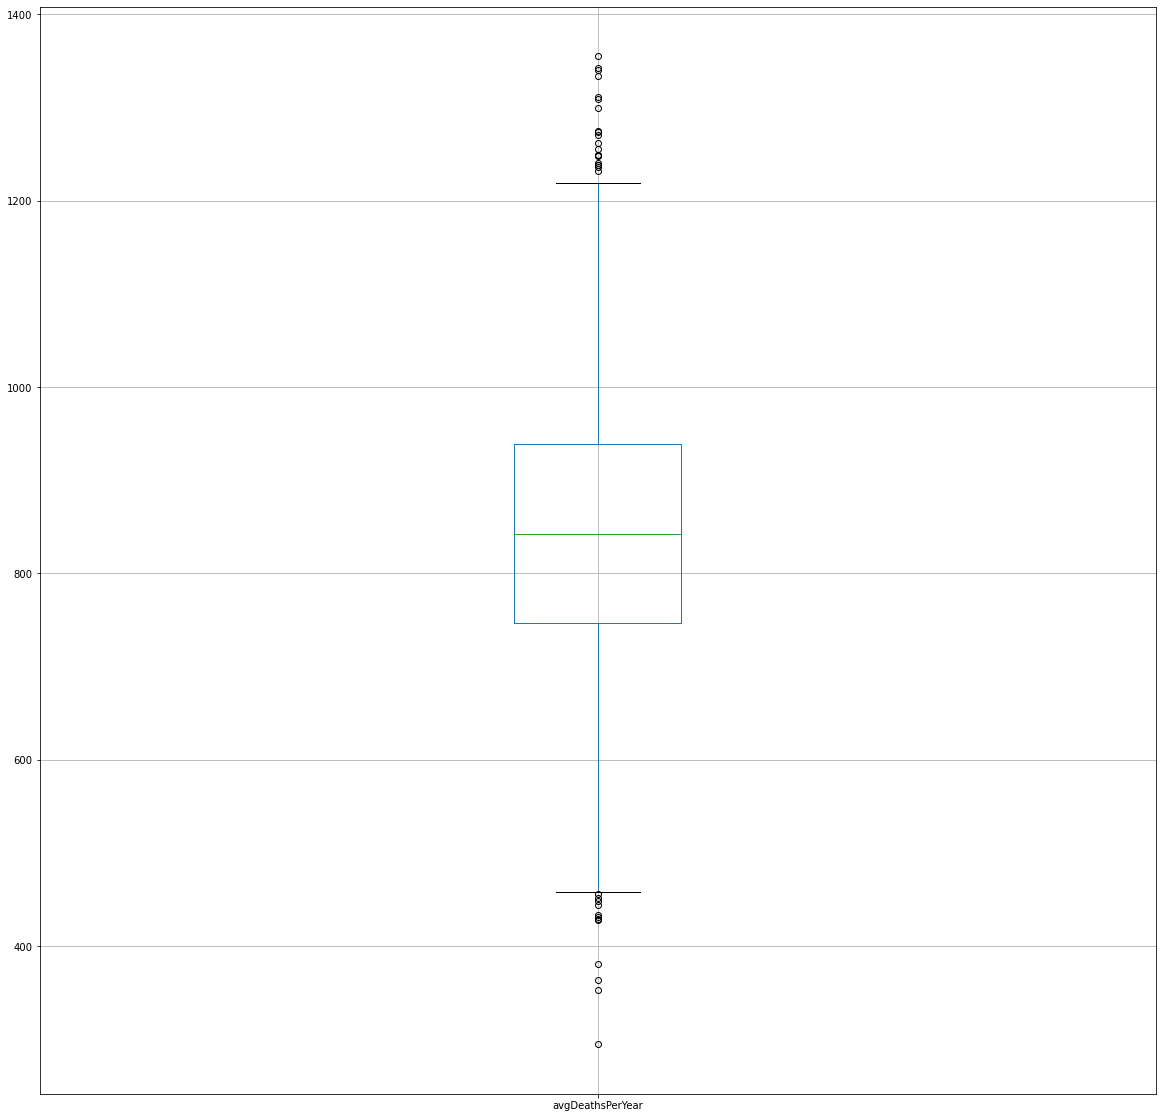

In [16]:
#removendo outliers
plt.figure(figsize=(20,20))
df_features=df_features[df_features["avgDeathsPerYear"]<1400]
df_features.boxplot(column="avgDeathsPerYear")

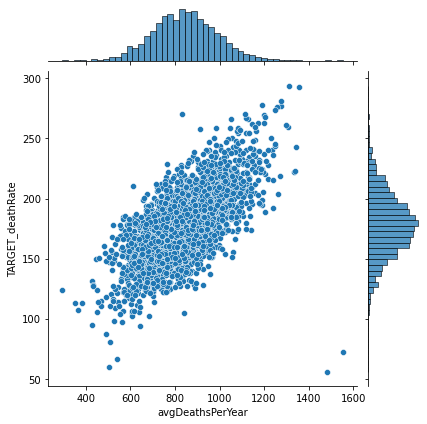

In [17]:
##relação da feature com a maior correlação
sns.jointplot(data=df, x='avgDeathsPerYear', y='TARGET_deathRate');


In [31]:
# 3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e
##avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df['avgDeathsPerYear']
y=df['TARGET_deathRate']

# Instanciando a classe do estimador
estimator=LinearRegression()

# Separando os dados em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

# Treinando o modelo
model=estimator.fit(X_train.values.reshape(-1,1),y_train)

# Fazendo previsões usando os dados de teste 
y_pred=estimator.predict(X_test.values.reshape(-1,1))

#Encontrando o resíduo
residuo=y_test-y_pred

# Analisando a distribuição do resíduo
plt.title("Distribuição dos resíduos")
sns.histplot(residuo, kde=True);

In [32]:
residuo.skew() # Distribuição assimétrica positiva

0.06009834922590418

In [33]:
plt.title("Valor predito vs Valor real")
sns.scatterplot(x=y_pred, y=y_test)
plt.plot(np.linspace(0, 400, 4000), np.linspace(0, 400, 4000), color="red")
plt.show()

In [35]:
# 3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

from sklearn.metrics import r2_score
from sklearn import metrics

model=[metrics.r2_score(y_test, y_pred),
                   metrics.mean_absolute_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred,squared=False)
                  ]

print('\nR²:', model[0])
print('MAE:', model[1])
print('MSE:', model[2])
print('RMSE:', model[3])


R²: 0.43852288381608673
MAE: 15.880176391105154
MSE: 404.833450252274
RMSE: 20.120473410242464


4.Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?


In [37]:
# Limpando as colunas com valores missing
df=df.drop(columns='binnedInc')
df=df.drop(columns='Geography')
df=df.dropna(axis='columns', how='any')
df

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000        890.770529             164.9     489.800000   
1      173.000000        669.088363             161.3     411.600000   
2      102.000000        744.083462             174.7     349.700000   
3      427.000000        953.773339             194.8     430.400000   
4       57.000000        646.194438             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684        762.753992             149.6     453.549422   
3043  1962.667684        838.694585             150.1     453.549422   
3044  1962.667684        829.638887             153.9     453.549422   
3045  1962.667684        943.206276             175.0     453.549422   
3046  1962.667684        808.811353             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
0       61898.0    260131.0            11.2   499.748204       39.3   
1       48127.0     43269.0            18.6    23.111234       33.0   
2       49348.0     21026.0            14.6    47.560164       45.0   
3       44243.0     75882.0            17.1   342.637253       42.8   
4       49955.0     10321.0            12.5     0.000000       48.3   
...         ...         ...             ...          ...        ...   
3042    46961.0      6343.0            12.4     0.000000       44.2   
3043    48609.0     37118.0            18.8   377.175494       30.4   
3044    51144.0     34536.0            15.0  1968.959926       30.9   
3045    50745.0     25609.0            13.3     0.000000       39.0   
3046    41193.0     37030.0            13.9     0.000000       26.2   

      MedianAgeMale  ...  PctPrivateCoverage  PctEmpPrivCoverage  \
0              36.9  ...                75.1                41.6   
1              32.2  ...                70.2                43.6   
2              44.0  ...                63.7                34.9   
3              42.2  ...                58.4                35.0   
4              47.8  ...                61.6                35.1   
...             ...  ...                 ...                 ...   
3042           41.1  ...                78.3                44.6   
3043           29.3  ...                64.5                48.6   
3044           30.5  ...                62.0                47.8   
3045           36.9  ...                75.9                49.6   
3046           25.5  ...                76.1                22.9   

      PctPublicCoverage  PctPublicCoverageAlone   PctWhite   PctBlack  \
0                  32.9                    14.0  81.780529   2.594728   
1                  31.1                    15.3  89.228509   0.969102   
2                  42.1                    21.1  90.922190   0.739673   
3                  45.3                    25.0  91.744686   0.782626   
4                  44.0                    22.7  94.104024   0.270192   
...                 ...                     ...        ...        ...   
3042               31.7                    13.2  90.280811   3.837754   
3043               28.8                    17.7  75.706245   2.326771   
3044               26.6                    16.8  87.961629   2.313188   
3045               29.5                    14.0  92.905681   1.176562   
3046               25.1                    12.6  70.098132  16.590100   

      PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate  
0     4.821857      1.843479             52.856076   6.118831  
1     2.246233      3.741352             45.372500   4.333096  
2     0.465898      2.747358             54.444868   3.729488  
3     1.161359      1.362643             51.021514   4.603841  
4     0.665830      0.492135             54.027460   6.796657  
...        ...           ...                   ...        ...  
3042  0.327613      1.700468             51.063830   7.773512  
3043  4.044920     14.130288             52.007937   8.186470  
3044  1.316472    

In [40]:
X=df.drop(columns=['TARGET_deathRate'])
y=df['TARGET_deathRate']

# Instanciando a classe do estimador
estimador=LinearRegression()

# Separando os dados em dados de treino e dados de teste
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=777)

# Treinando o modelo
model_2=estimador.fit(X_train,y_train)

# Fazendo previsões usando os dados de teste 
y_pred=estimador.predict(X_test)

# Encontrando o resíduo
residuo=y_test-y_pred

# Analisando a distribuição do resíduo
plt.title("Distribuição dos resíduos")
sns.histplot(residuo, kde=True);

In [41]:
residuo.skew() # Distribuição assimétrica positiva

0.09269856230738366

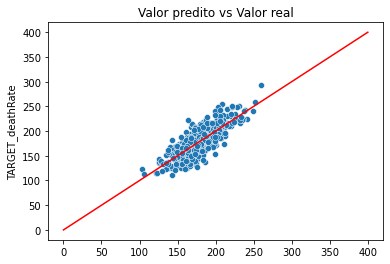

In [42]:
plt.title("Valor predito vs Valor real")
sns.scatterplot(x=y_pred, y=y_test)
plt.plot(np.linspace(0, 400, 4000), np.linspace(0, 400, 4000), color="red")
plt.show()

In [44]:
# Avaliando o resultado do modelo sem utilizar min-max scaler
model_2=[metrics.r2_score(y_test, y_pred),
                   metrics.mean_absolute_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred,squared=False)
                  ]

print('\nR²:', model_2[0])
print('MAE:', model_2[1])
print('MSE:', model_2[2])
print('RMSE:', model_2[3])


R²: 0.630256745987015
MAE: 12.634018676859865
MSE: 266.5904502874702
RMSE: 16.32759781129699


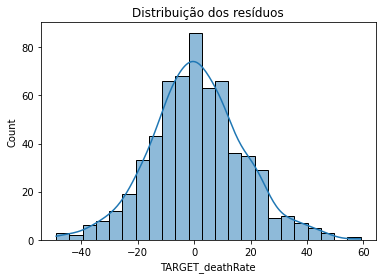

In [48]:
X=df.drop(columns=['TARGET_deathRate'])
y=df['TARGET_deathRate']

# Instanciando a classe do estimador
estimator=LinearRegression()

# Separando os dados em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

# Aplicando MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(X_train)

# Transformando os dados
X_train=mms.transform(X_train)
X_test=mms.transform(X_test)

# Treinando o modelo
model_3=estimator.fit(X_train,y_train)

# Fazendo previsões usando os dados de teste 
y_pred=estimator.predict(X_test)

#Encontrando o resíduo
residuo=y_test-y_pred

# Analisando a distribuição do resíduo
plt.title("Distribuição dos resíduos")
sns.histplot(residuo, kde=True);

In [50]:
residuo.skew() # Distribuição assimétrica positiva

0.09269856230789178

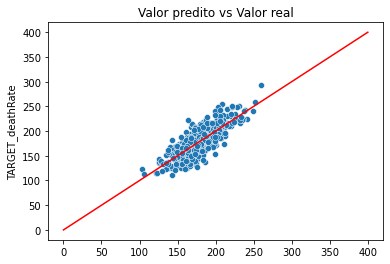

In [51]:
plt.title("Valor predito vs Valor real")
sns.scatterplot(x=y_pred, y=y_test)
plt.plot(np.linspace(0, 400, 4000), np.linspace(0, 400, 4000), color="red")
plt.show()

In [52]:
# Avaliando o resultado do modelo utilizando min-max scaler
model_3=[metrics.r2_score(y_test, y_pred),
                   metrics.mean_absolute_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred),
                   metrics.mean_squared_error(y_test, y_pred,squared=False)
                  ]

print('\nR²:', model_3[0])
print('MAE:', model_3[1])
print('MSE:', model_3[2])
print('RMSE:', model_3[3])


R²: 0.6302567459869863
MAE: 12.634018676860707
MSE: 266.59045028749085
RMSE: 16.327597811297622


In [53]:
# Avaliando os coeficientes e determinando as features mais importantes para o modelo
coeff_df = pd.DataFrame(estimator.coef_, X.columns, columns=['Parameter value'])

coeff_df.abs().sort_values(by='Parameter value',ascending=False).head()

Parameter value
avgDeathsPerYear           103.285421
incidenceRate              100.615889
PctMarriedHouseholds        56.175315
PercentMarried              45.600605
MedianAgeMale               36.617701

5.Compare os três modelos desenvolvidos.

In [56]:
print("Regressão linear simples")
print('\nR^2:', model[0])
print('MAE:', model[1])
print('MSE:', model[2])
print('RMSE:', model[3])
print("\n")

print("Regressão linear múltipla sem MMS")
print('\nR^2:', model_2[0])
print('MAE:', model_2[1])
print('MSE:', model_2[2])
print('RMSE:', model_2[3])
print("\n")

print("Regressão linear múltipla com MMS")
print('\nR^2:', model_3[0])
print('MAE:', model_3[1])
print('MSE:', model_3[2])
print('RMSE:', model_3[3])

Regressão linear simples

R^2: 0.43852288381608673
MAE: 15.880176391105154
MSE: 404.833450252274
RMSE: 20.120473410242464


Regressão linear múltipla sem MMS

R^2: 0.630256745987015
MAE: 12.634018676859865
MSE: 266.5904502874702
RMSE: 16.32759781129699


Regressão linear múltipla com MMS

R^2: 0.6302567459869863
MAE: 12.634018676860707
MSE: 266.59045028749085
RMSE: 16.327597811297622


R: O modelo de regressão linear múltipla sem utilização do Min Max Scaler foi ligeiramente melhor que o modelo que utilizou o Min Max Scaler.
O modelo de regressão linear simples foi pior que o modelo múltiplo.